In [2]:
import numpy as np
import pandas as pd

# Problem Understanding

Your Real Estate partner in California needs your help with pricing homes at the optimal level<br>

Help them to predict the expected sale value of properties in their State and you will get slice of their additional sales commission 💸

# Data Understanding

In [3]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
X = pd.DataFrame(data['data'],columns=data['feature_names'])
y = data['target']

print("The target variable: {}".format(y))
print("-------------------")
print("")

print("The independent variables:")
X.head()

The target variable: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
-------------------

The independent variables:


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

### Checking multicollinearity

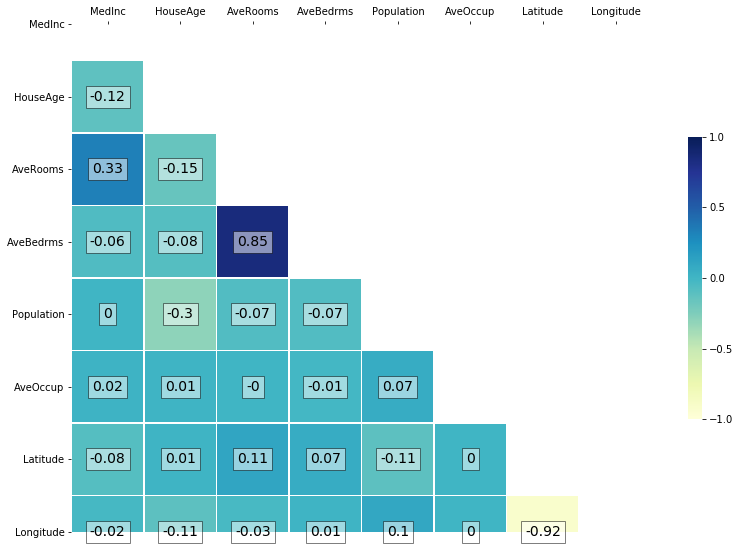

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(13, 13)) 
corr_matrix = X.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
heatmap = sns.heatmap(round(corr_matrix,2), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = "YlGnBu",
                      cbar_kws = {"shrink": .4, 
                                "ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 14, "color" : "black", "backgroundcolor": "white", "bbox": dict(facecolor='white', alpha=0.5)})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
ax.xaxis.set_ticks_position("top")
# sns.set_style({'xtick.bottom': True}, {'ytick.right': True})

In [46]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

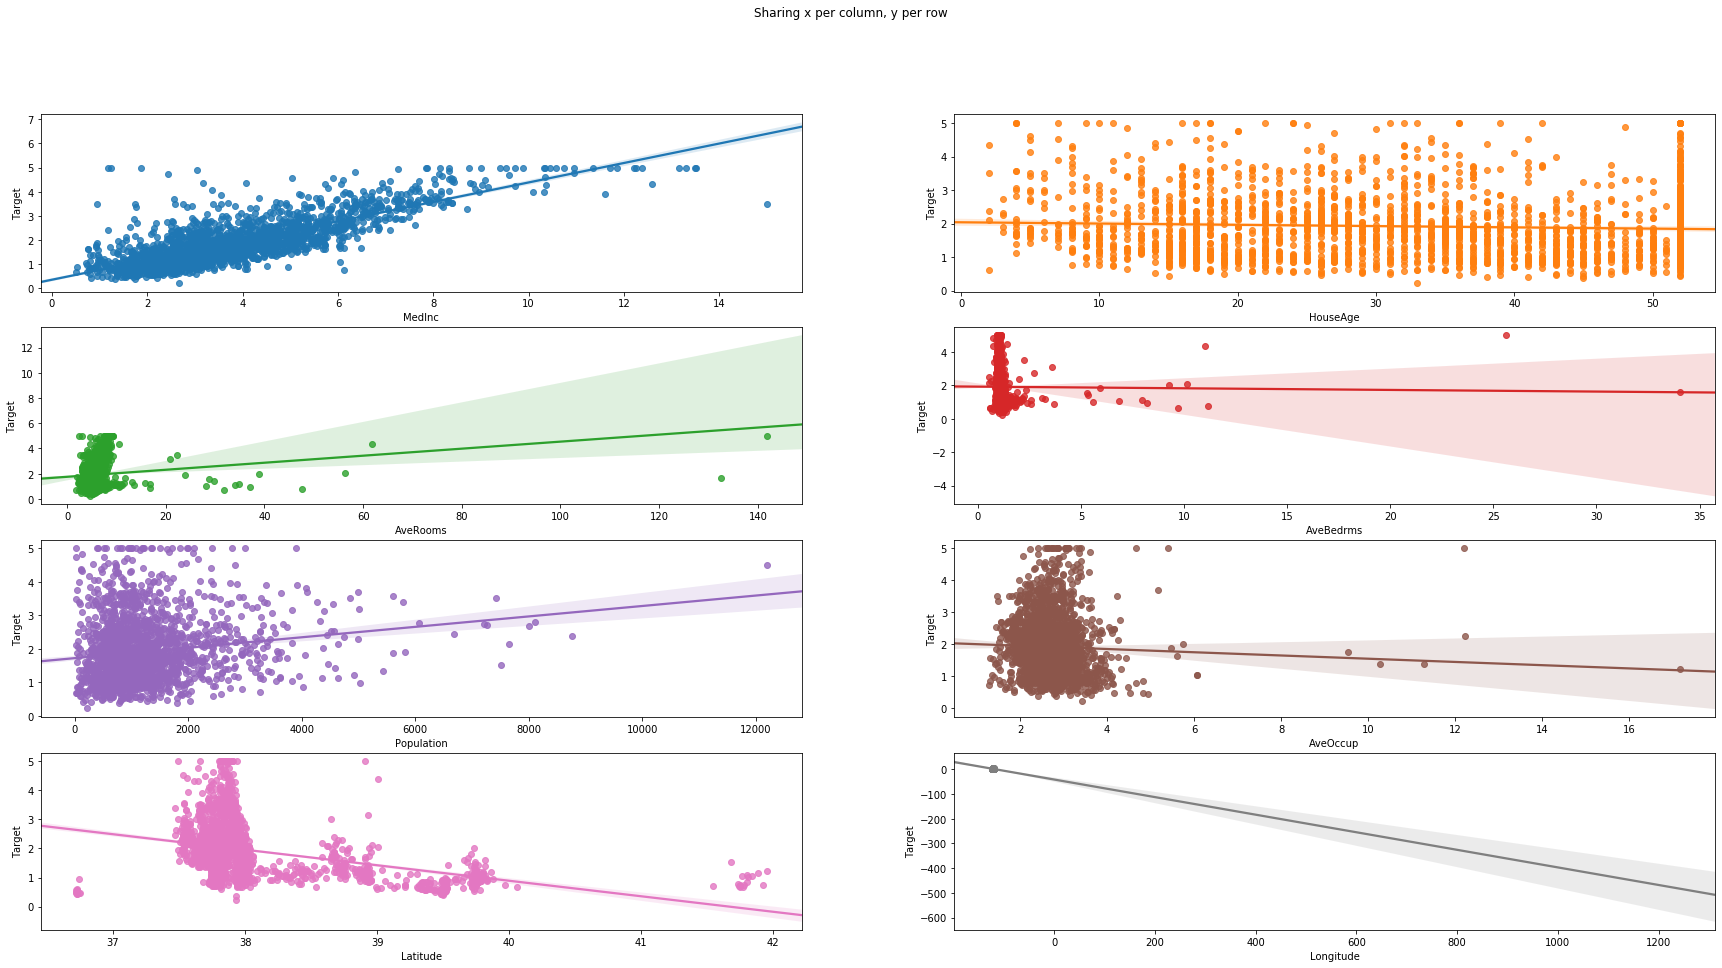

In [62]:

X['Target'] = y 

fig, axs = plt.subplots(4, 2,figsize=(30,15))
fig.suptitle('Sharing x per column, y per row')

# cmap = plt.get_cmap('winter')
# colors = cmap(256)

# plt.scatter(X[list(X.columns)[0]][:2000], X["Target"][:2000], c=X.index[:2000], s=30, cmap="winter", ax = axs[0][0])
# plt.scatter(X[list(X.columns)[1]][:2000], X["Target"][:2000], c=X.index[:2000], s=30, cmap="winter", ax = axs[0][1])
# plt.scatter(X[list(X.columns)[2]][:2000], X["Target"][:2000], c=X.index[:2000], s=30, cmap="winter", ax = axs[1][0])
# plt.scatter(X[list(X.columns)[3]][:2000], X["Target"][:2000], c=X.index[:2000], s=30, cmap="winter", ax = axs[1][1])
# plt.scatter(X[list(X.columns)[4]][:2000], X["Target"][:2000], c=X.index[:2000], s=30, cmap="winter", ax = axs[2][0])
# plt.scatter(X[list(X.columns)[5]][:2000], X["Target"][:2000], c=X.index[:2000], s=30, cmap="winter", ax = axs[2][1])
# plt.scatter(X[list(X.columns)[6]][:2000], X["Target"][:2000], c=X.index[:2000], s=30, cmap="winter", ax = axs[3][0])
# plt.scatter(X[list(X.columns)[7]][:2000], X["Target"][:2000], c=X.index[:2000], s=30, cmap="winter", ax = axs[3][1])

# plt.colorbar(points)

# sns.regplot(X[list(X.columns)[0]][:2000], X["Target"][:2000], data=X, scatter=False, color= ".1")

sns.regplot(x=X[list(X.columns)[0]][:2000], y=X["Target"][:2000], data=X, ax= axs[0][0], scatter_kws={"cmap":'winter'})
sns.regplot(x=X[list(X.columns)[1]][:2000], y=X["Target"][:2000], data=X, ax= axs[0][1], scatter_kws={"cmap":'winter'})
sns.regplot(x=X[list(X.columns)[2]][:2000], y=X["Target"][:2000], data=X, ax= axs[1][0], scatter_kws={"cmap":'winter'})
sns.regplot(x=X[list(X.columns)[3]][:2000], y=X["Target"][:2000], data=X, ax= axs[1][1], scatter_kws={"cmap":'winter'})
sns.regplot(x=X[list(X.columns)[4]][:2000], y=X["Target"][:2000], data=X, ax= axs[2][0], scatter_kws={"cmap":'winter'})
sns.regplot(x=X[list(X.columns)[5]][:2000], y=X["Target"][:2000], data=X, ax= axs[2][1], scatter_kws={"cmap":'winter'})
sns.regplot(x=X[list(X.columns)[6]][:2000], y=X["Target"][:2000], data=X, ax= axs[3][0], scatter_kws={"cmap":'winter'})
sns.regplot(x=X[list(X.columns)[7]][:2000], y=X["Target"][:2000], data=X, ax= axs[3][1], scatter_kws={"cmap":'winter'})



# for ax in fig.get_axes():
#     ax.label_outer()

####################
X.drop('Target', axis=1, inplace=True)
####################

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly.fit(X)
X_poly = poly.transform(X)
X_poly = pd.DataFrame(X_poly)
X_poly.head()
cols = poly.get_feature_names(X.columns)
X_poly.columns = cols
X_poly.head()

1  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  1.0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  1.0  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  1.0  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  1.0  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  1.0  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   MedInc^2  ...  Population^2  Population AveOccup  \
0    -122.23  69.308955  ...      103684.0           822.888889   
1    -122.22  68.913242  ...     5764801.0          5065.730228   
2    -122.24  52.669855  ...      246016.0          1389.920904   
3    -122.25  31.844578  ...      311364.0          1421.753425   
4    -122.25  14.793254  ...      319225.0          1232.528958   

   Population Latitude  Population Longitude  AveOccup^2  AveOccup Latitude  \
0             12197.36             -39358.06    6.530864          96.804444   
1             90901.86            -293450.22    4.451433          79.878612   
2             18773.60             -60631.04    7.852660         106.065537   
3             21120.30             -68215.50    6.492025          96.439726   
4             21385.25             -69071.25    4.758799          82.568533   

   AveOccup Longitude  Latitude^2  Latitude Longitude  Longitude^2  
0         -312.365556   1434.8944          -4630.0724   14940.1729  
1         -257.864868   1433.3796          -4627.2492   14937.7284  
2         -342.548249   1432.6225          -4626.7840   14942.6176  
3         -311.486301   1432.6225          -4627.1625   14945.0625  
4         -266.684363   1432.6225          -4627.1625   14945.0625  

[5 rows x 45 columns]

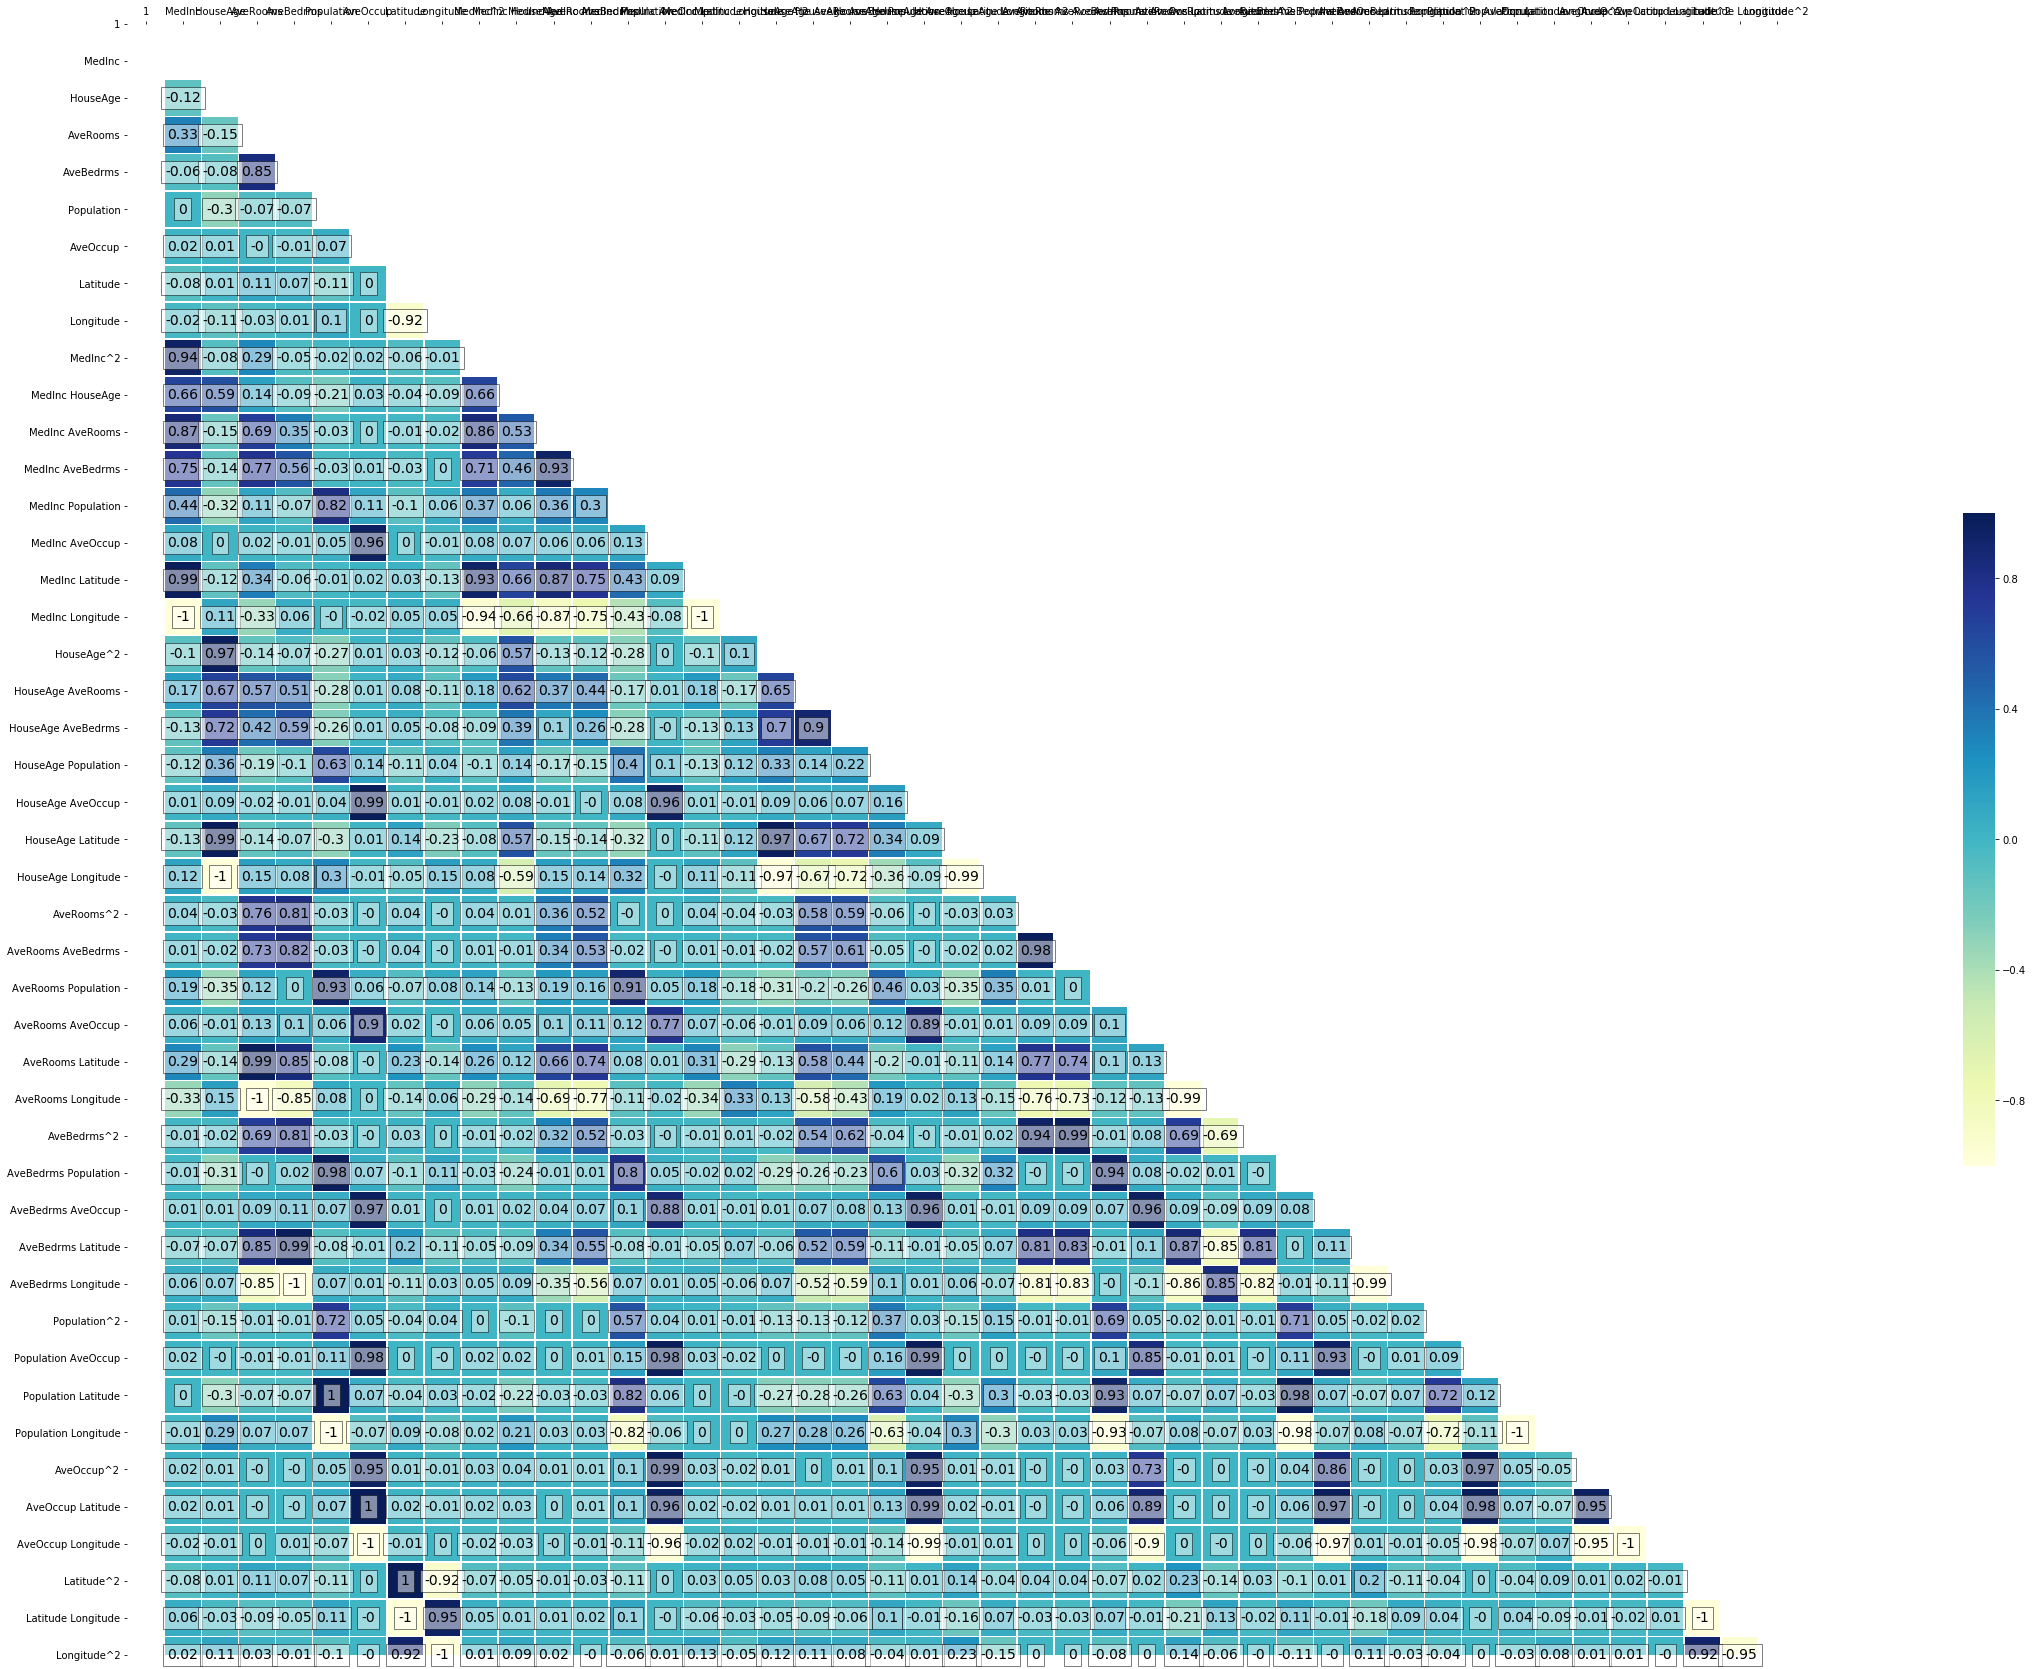

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(60, 30)) 
corr_matrix = X_poly.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
heatmap = sns.heatmap(round(corr_matrix,2), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = "YlGnBu",
                      cbar_kws = {"shrink": .4, },
                                # "ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 14, "color" : "black", "backgroundcolor": "white", "bbox": dict(facecolor='white', alpha=0.5)})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
ax.xaxis.set_ticks_position("top")

# Data preparation

### Splitting IVs (X), and target (y) data into train and test splits

In [7]:
from sklearn.model_selection import train_test_split
X_train_raw, X_test, y_train_raw, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Splitting train data to train and validation data splits 

In [19]:
# from sklearn.model_selection import train_test_split 
X_train, X_val, y_train, y_val = train_test_split(X_train_raw, y_train_raw,test_size=0.2, random_state=111)
print("Randomly sampled ")


Randomly sampled 


Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]
Index: []

### Scaling the datasets using StandardScaler to z-scores

In [10]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train_df = pd.DataFrame(data=X_train, columns=X.columns)
print("Standardised Train Data:")
X_train_df.head()

Standardised Train Data:


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0 -0.071945  0.582633 -0.095504  -0.108526    1.040097  0.179752 -0.897221   
1  0.012791  1.376657 -0.238183  -0.370229   -0.535028  0.009843  1.077455   
2  0.145498 -0.926013 -0.165065   0.177523   -0.904184 -0.105750 -1.336038   
3 -0.728882 -1.402427 -0.198917  -0.066814    0.352366 -0.050031  0.512595   
4 -0.824772 -1.084817  0.109339   0.012017    0.279600 -0.061668  1.273522   

   Longitude  
0   0.853187  
1  -1.365094  
2   1.172221  
3  -0.054065  
4  -0.587449

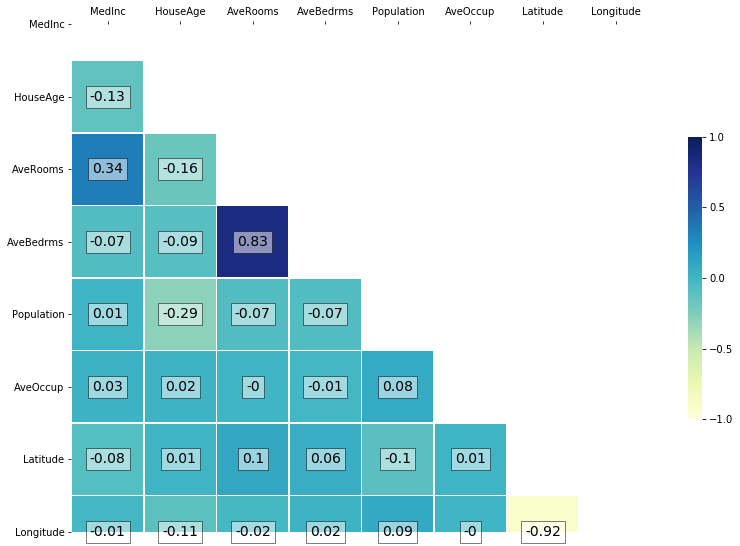

In [17]:
f, ax = plt.subplots(figsize=(13, 13)) 
corr_matrix = X_train_df.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
heatmap = sns.heatmap(round(corr_matrix,2), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = "YlGnBu",
                      cbar_kws = {"shrink": .4, 
                                "ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 14, "color" : "black", "backgroundcolor": "white", "bbox": dict(facecolor='white', alpha=0.5)})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
ax.xaxis.set_ticks_position("top")

**Just for reference:**

X_train_raw ; y_train_raw  ; Size = 0.8
       
    X_train ;   y_train    ; Size = 0.64

    X_val   ;     y_val    ; Size = 0.16

X_test  ; y_test   ; Size = 0.20

    X_test  ;     y_test   ; Size = 0.20
__________________________________________________________________________
**for LINEAR REGRESSION:**
    
    !!!from sklearn.linear_model import LinearRegression!!!
    
    lin_reg = LinearRegression() #-----------------------initialising----------------#

**learner and training score:**

    lin_reg.fit(X_train ,y_train) #----------------------learning process------------#

    lin_score = lin_reg.score(X_train ,y_train) #--------training score process------#

**validation score:**

    val_score = lin_reg.score(X_val ,y_val) #------------validation score process----#

**extra analysis:**

getting parameters:

    parameters = lin_reg.coef_
    coef_df = pd.DataFrame(parameters, X.columns, columns=['linear_coefficients'])  

getting predicted values:

    y_pg.predict(X_val) #------------------------------model's predicted values-------#

error analysis:

    !!!from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error!!!

    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    r2_score = r2_score(y_val, y_pred)
__________________________________________________________________________
**for LASSO:**

    !!!from sklearn.linear_model import Lasso!!!

    lasso = Lasso() #------------------------------------initialising-----------------#

**learner and training score:**

    lasso.fit(X_train, y_train) #------------------------learning process-------------#
    
    las_score = lasso.score(X_train, y_train) #---------training score process-------#

**validation score:**

    val_score = lasso.score(X_val, y_val) #--------------validation score process-----#

**extra analysis:**

getting parameters:

    parameters = lasso.coef_
    coef_df['lasso_coef'] = parameters

getting predicted values:

    y_pred = lasso.predict(X_val) #--------------------model's predicted values-------#

error analysis:

    !!from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error!!

    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    r2_score = r2_score(y_val, y_pred)


# Modelling and Model Evaluation

### Training a linear regression model

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print("Train score:")
print(lin_reg.score(X_train,y_train))
print("___________________")
print("Validation score:")
print(lin_reg.score(X_val,y_val))
parameters = lin_reg.coef_
coef_df = pd.DataFrame(parameters, X.columns, columns=['linear_coef'])  
coef_df

Train score:
0.6213885075776282
___________________
Validation score:
0.5766770409276389


linear_coef
MedInc         0.866547
HouseAge       0.128225
AveRooms      -0.293936
AveBedrms      0.338271
Population    -0.000290
AveOccup      -0.042510
Latitude      -0.881091
Longitude     -0.857321

### Viewing the linear prediction vs validation (truth) set

In [11]:
y_pred = lin_reg.predict(X_val)

df = pd.DataFrame({'validation': y_val, 'linear_predicted': y_pred})
print("The model has returned its predicted values of the validation sample")
df['linear_abs_difference'] = abs(df['validation'] - df['linear_predicted'])
df.head()

The model has returned its predicted values of the validation sample


validation  linear_predicted  linear_abs_difference
0       2.826          1.987208               0.838792
1       2.056          1.273920               0.782080
2       1.958          2.401762               0.443762
3       4.202          2.956576               1.245424
4       1.218          1.945157               0.727157

### Calculating R-squared, MSE and MAE manually

In [12]:
mean_abs_err = df['linear_abs_difference'].sum()/len(df)
mean_sq_err = sum(df['linear_abs_difference'].map(lambda x: x**2))/len(df)
root_mean_sq_err = np.sqrt(mean_sq_err)
print("MAE: ", mean_abs_err)
print("MSE: ", mean_sq_err)
print("RMSE: ", root_mean_sq_err)
print("R^2 Score: ") #Equation?

MAE:  0.5454070814126395
MSE:  0.5697588874797633
RMSE:  0.7548237459697219
R^2 Score: 


### Calculating R-squared, MSE and MAE using sklearn.metrics

In [13]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#
print('MAE', mean_absolute_error(y_val, y_pred))  
print('MSE:', mean_squared_error(y_val, y_pred))  
print('RMSE:', np.sqrt(mean_squared_error(y_val, y_pred)))
print('R^2 Score:', r2_score(y_val, y_pred))

MAE 0.5454070814126395
MSE: 0.5697588874797632
RMSE: 0.7548237459697219
R^2 Score: 0.5766770409276389


### Train a LASSO model

In [14]:
from sklearn.linear_model import Lasso

lasso = Lasso(.2)
lasso.fit(X_train, y_train)
print("Train score:")
print(lasso.score(X_train, y_train))
print("___________________")
print("Validation score:")
print(lasso.score(X_val, y_val))

parameters = lasso.coef_
coef_df['lasso_coef'] = parameters
print("___________________")
print("Coefs of both methods:")
coef_df

Train score:
0.45671475439125386
___________________
Validation score:
0.41717993056903846
___________________
Coefs of both methods:


linear_coef  lasso_coef
MedInc         0.866547      0.6059
HouseAge       0.128225      0.0000
AveRooms      -0.293936     -0.0000
AveBedrms      0.338271     -0.0000
Population    -0.000290     -0.0000
AveOccup      -0.042510     -0.0000
Latitude      -0.881091     -0.0000
Longitude     -0.857321     -0.0000

### Viewing the lasso prediction vs linear prediction vs validation (truth) set 

In [15]:
# Lets see how the two models differ:
lasso_pred = lasso.predict(X_val)  
df['lasso_predicted'] = lasso_pred
df['lasso_abs_difference'] = abs(df['validation'] - df['lasso_predicted'])

df.head()

validation  linear_predicted  linear_abs_difference  lasso_predicted  \
0       2.826          1.987208               0.838792         1.837643   
1       2.056          1.273920               0.782080         1.300178   
2       1.958          2.401762               0.443762         2.066363   
3       4.202          2.956576               1.245424         2.472746   
4       1.218          1.945157               0.727157         2.025842   

   lasso_abs_difference  
0              0.988357  
1              0.755822  
2              0.108363  
3              1.729254  
4              0.807842

### Calculating R-squared, MSE and MAE using sklearn.metrics

In [16]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('MAE', mean_absolute_error(y_val, y_pred))  
print('MSE:', mean_squared_error(y_val, y_pred))  
print('RMSE:', np.sqrt(mean_squared_error(y_val, y_pred)))
print('R^2 Score:', r2_score(y_val, y_pred))

MAE 0.5454070814126395
MSE: 0.5697588874797632
RMSE: 0.7548237459697219
R^2 Score: 0.5766770409276389


## Optionally using KFold

In [17]:
from sklearn.model_selection import KFold, cross_validate # import KFold
kf = KFold(n_splits=5, shuffle=True) # Define the split - into 2 folds 
# kf.get_n_splits(X_train_raw) # returns the number of splitting iterations in the cross-validator
print("Fold splitting params:")
print("----------------------")
print(kf) 
print("")
print("View splits and shape:")
print("----------------------")

for train, val in kf.split(X_train_raw, y_train_raw):
	print('train: {}, shape: {}, validation: {}, shape: {}'.format(train, train.shape,val, val.shape))
print("")
print("KFold Linear regression results:")
print("----------------------")

lin_reg_K = LinearRegression()
result = cross_validate(lin_reg_K, X_train_raw, y_train_raw, cv=kf,
               return_train_score=True, return_estimator=True)

parameters = result['estimator'][0]
parameters.coef_

print('Train scores: {}'.format(result['train_score']))
print('Test scores: {}'.format(result['test_score']))
print("")
print("Average result:")
print("----------------------")
print('Train average: {}'.format(result['train_score'].mean()))
print('Test average: {}'.format(result['test_score'].mean()))
for model,index in zip(result['estimator'],range(0,len(result['estimator']))):
    coef_df['kfold_coef_{}'.format(index+1)] = model.coef_

Fold splitting params:
----------------------
KFold(n_splits=5, random_state=None, shuffle=True)

View splits and shape:
----------------------
train: [    0     1     3 ... 16508 16510 16511], shape: (13209,), validation: [    2    13    14 ... 16473 16494 16509], shape: (3303,)
train: [    0     1     2 ... 16506 16509 16511], shape: (13209,), validation: [    4     5     7 ... 16507 16508 16510], shape: (3303,)
train: [    0     2     3 ... 16509 16510 16511], shape: (13210,), validation: [    1    17    22 ... 16479 16496 16501], shape: (3302,)
train: [    1     2     4 ... 16508 16509 16510], shape: (13210,), validation: [    0     3    12 ... 16505 16506 16511], shape: (3302,)
train: [    0     1     2 ... 16509 16510 16511], shape: (13210,), validation: [    6     8    10 ... 16491 16497 16499], shape: (3302,)

KFold Linear regression results:
----------------------
Train scores: [0.6160322  0.61293738 0.60980695 0.60849126 0.61586562]
Test scores: [0.59870826 0.61012897 0.62370

# Interprete your winning model

### What can you tell your business partner by looking at the coefficients?

In [18]:
coef_df

linear_coef  lasso_coef  kfold_coef_1  kfold_coef_2  kfold_coef_3  \
MedInc         0.866547      0.6059      0.454195      0.448803      0.447845   
HouseAge       0.128225      0.0000      0.009452      0.009884      0.009678   
AveRooms      -0.293936     -0.0000     -0.128698     -0.124301     -0.120830   
AveBedrms      0.338271     -0.0000      0.825368      0.757544      0.773299   
Population    -0.000290     -0.0000     -0.000001     -0.000002     -0.000005   
AveOccup      -0.042510     -0.0000     -0.003267     -0.004083     -0.003236   
Latitude      -0.881091     -0.0000     -0.416084     -0.419633     -0.421529   
Longitude     -0.857321     -0.0000     -0.432126     -0.432882     -0.433704   

            kfold_coef_4  kfold_coef_5  
MedInc          0.445988      0.447508  
HouseAge        0.009459      0.010141  
AveRooms       -0.125965     -0.118576  
AveBedrms       0.806115      0.756818  
Population     -0.000001     -0.000002  
AveOccup       -0.003657     -0.003835  
Latitude       -0.423009     -0.417534  
Longitude      -0.439190     -0.429604

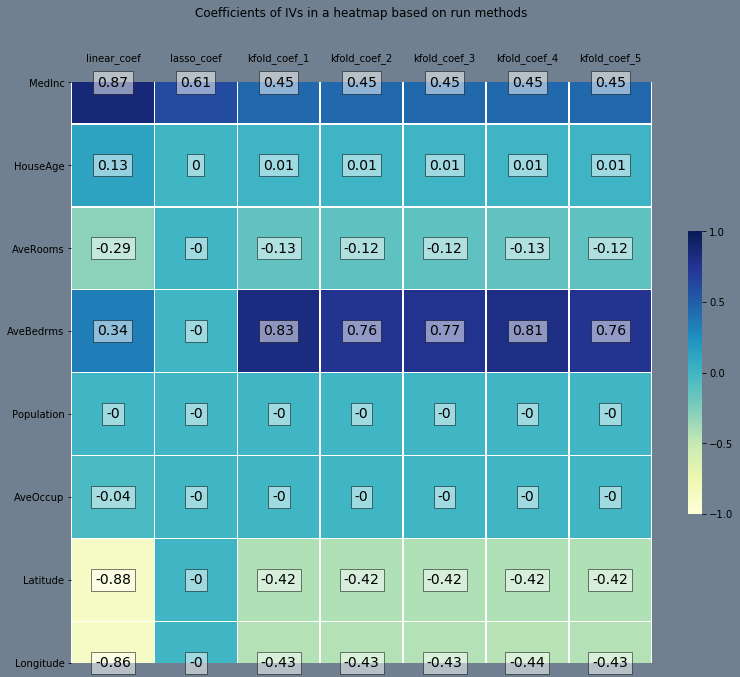

In [19]:
f, ax = plt.subplots(figsize=(13, 13)) 
# mask = np.zeros_like(coef_df, dtype=np.bool)
# mask[np.triu_indices_from(mask)]= True

heatmap = sns.heatmap(round(coef_df,2), 
                      square = True,
                      linewidths = .5,
                      cmap = "YlGnBu",
                      cbar_kws = {"shrink": .4, 
                                "ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 14, "color" : "black", "backgroundcolor": "white", "bbox": dict(facecolor='white', alpha=0.5)})
# annot_kws = {"size": 14, "color" : "black", "backgroundcolor": "white"})

#add the column names as labels
f.patch.set_facecolor('slategray')
plt.title("Coefficients of IVs in a heatmap based on run methods\n\n")

ax.set_yticklabels(coef_df.index, rotation = 0)
ax.set_xticklabels(coef_df.columns + '\n')
ax.xaxis.set_ticks_position("top")

# sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

### Looking at the the coef_df we can analyse the effect of each independent variable on out target
### The main impactful coefficients can be seen to be MedInc, AveBedrms + AveRooms (Multicollinearity), Latitude, and Longitude
